Code from [this page](https://machinelearningmastery.com/develop-first-xgboost-model-python-scikit-learn/)

In [1]:
from numpy import loadtxt
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [2]:
dataset = loadtxt("xgboost/pima-indians-diabetes.data.csv", delimiter=",")

In [3]:
X = dataset[:,0:8]
y = dataset[:,8]

In [4]:
seed = 7
test_size = 0.33
# random split data into training dataset ans test dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=seed)

In [5]:
# train the model
model = XGBClassifier()
model.fit(X,y)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [6]:
y_pred = model.predict(X_test)

In [7]:
predictions = [round(value) for value in y_pred]

In [11]:
accuracy = accuracy_score(y_test, predictions)
print(accuracy)

0.88188976378


### Use neural network for this problem

In [44]:
import tensorflow as tf
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
%matplotlib inline

In [45]:
dataset = np.loadtxt("xgboost/pima-indians-diabetes.data.csv", delimiter=",")

In [46]:
X = dataset[:,0:8]
y = dataset[:,8]

In [47]:
seed = 1
test_size = 0.3
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=seed)

In [48]:
def generate_train_data(X_train, y_train, batch_size=32):
    
    length = X_train.shape[0]
    idxs = np.random.choice(range(length), batch_size)
    
    X_train_batch = [X_train[i] for i in idxs]
    y_train_batch = [y_train[i] for i in idxs]

    X_train_batch = np.array(X_train_batch)
    y_train_batch = np.array(y_train_batch)  
    y_train_batch = np.expand_dims(y_train_batch, axis=1)
    
    return X_train_batch, y_train_batch

#### model : fully connected neural network

In [84]:
hidden_1 = 100
hidden_2 = 100
output_dim = 1

num_epoches = 3000

In [85]:
X = tf.placeholder(dtype=tf.float32, shape=(None,8), name="X")
y = tf.placeholder(dtype=tf.float32, shape=(None,1), name="y")

In [86]:
h1 = tf.layers.dense(X, units=hidden_1, activation=tf.nn.relu, kernel_initializer=tf.contrib.layers.xavier_initializer())
h2 = tf.layers.dense(h1, units=hidden_2, activation=tf.nn.relu, kernel_initializer=tf.contrib.layers.xavier_initializer())
z = tf.layers.dense(h2, units=output_dim)
# a = tf.nn.softmax(z)

In [87]:
# loss = tf.losses.sigmoid_cross_entropy(a, y)
loss = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=z, labels=y))

In [88]:
optimizer = tf.train.AdamOptimizer(learning_rate=0.001)
train_op = optimizer.minimize(loss)

In [92]:
with tf.Session() as sess:
    init = tf.global_variables_initializer()
    sess.run(init)
    losses = []
    for epoch in range(num_epoches):
        X_train_batch, y_train_batch = generate_train_data(X_train, y_train)
        # print(X_train_batch.shape, y_train_batch.shape)
        feed_dict = {X : X_train_batch, y : y_train_batch}
        _, loss_e = sess.run([train_op, loss], feed_dict=feed_dict)
        losses.append(loss_e)
        
        # eveluate on test set
        if epoch % 500 == 0:
            y_pred = sess.run(z, feed_dict={X : X_train})
            predictions = [np.round(value) for value in y_pred]
            accuracy = accuracy_score(y_train, predictions)
            print("accuracy on training set : ", accuracy)
            
            y_pred = sess.run(z, feed_dict={X : X_test})
            predictions = [np.round(value) for value in y_pred]
            accuracy = accuracy_score(y_test, predictions)
            print("accuracy on test set : ", accuracy)

accuracy on training set :  0.0409683426443
accuracy on test set :  0.0606060606061
accuracy on training set :  0.240223463687
accuracy on test set :  0.25974025974
accuracy on training set :  0.143389199255
accuracy on test set :  0.199134199134
accuracy on training set :  0.202979515829
accuracy on test set :  0.160173160173
accuracy on training set :  0.119180633147
accuracy on test set :  0.142857142857
accuracy on training set :  0.255121042831
accuracy on test set :  0.246753246753


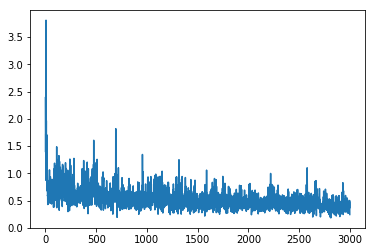

In [93]:
plt.plot(losses)

# Changelog
- 20180421 v0
    - 尝试使用`xgboost`做分类
    - 尝试使用全连接神经网络分类并与`xgboost`结果进行对比，失败
    - TODO
        - 尝试使用`xgboost`做回归
        - 使用`lstm`进行回归，并与`xgboost`进行对比